# Final

This dataset has recorded the number of bank failures in the US since 2000.

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
bankfailures = pd.read_csv('bankfailurelist.csv', encoding='cp1252')

# Line plot of bank failures since 2000

The yearly line plot of the data:

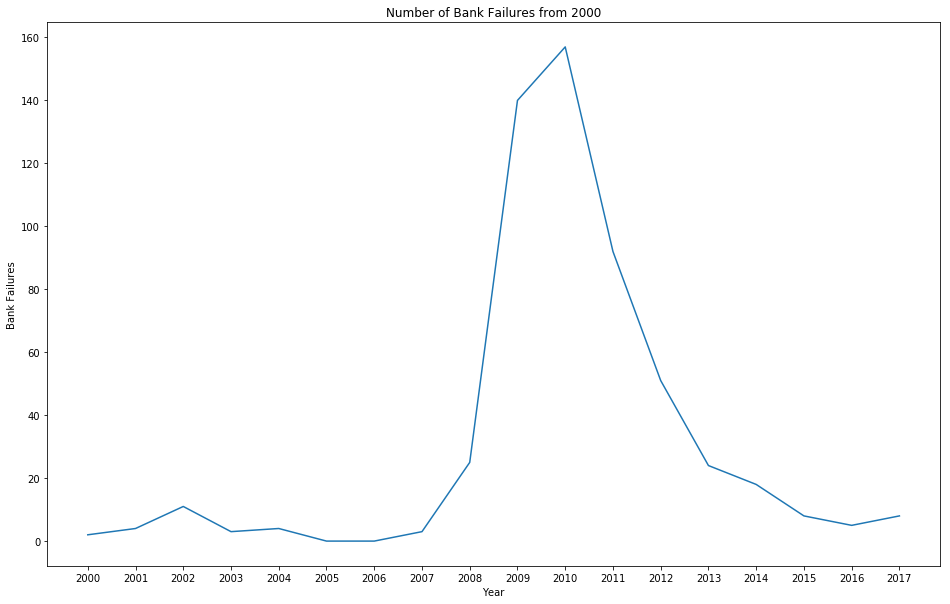

In [11]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
fails = [2, 4, 11, 3, 4, 0, 0, 3, 25, 140, 157, 92, 51, 24, 18, 8, 5, 8]
plt.plot(year, fails)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Bank Failures')
plt.title('Number of Bank Failures from 2000')
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = (14,8)

Based on the yearly line plot, the number of bank failures remained fairly steady between 2000 and 2007, with a small spike in 2002.  There is a considerable spike between 2007 and 2010, certainly due to the Great Recession.  Bank failures seemed to peak in 2010, most likely in wake of the major financial crisis that occurred during this time period.  After 2010 the number of bank failures rapidly decreased.  The rate of decrease slowed from 2013 onward, with a small increase starting in 2016.

Here is the monthly line plot of the data:

In [10]:
from datetime import datetime

df = pd.read_csv('/Users/sandymartinez/Documents/python/banklistmonthly1.csv', encoding='cp1252')

data = [go.Scatter(x=df.Closing_Date, y=df['Failures'])]

layout = dict(title = 'Monthly Bank Failures Since 2000',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Bank Failures'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-simple')

Looking at the monthly data, the number of bank failures seems to follow a cyclical pattern, indicated by the sharp rises and falls of the data through time.

# Stacked bar chart representing the top few acquiring institutions

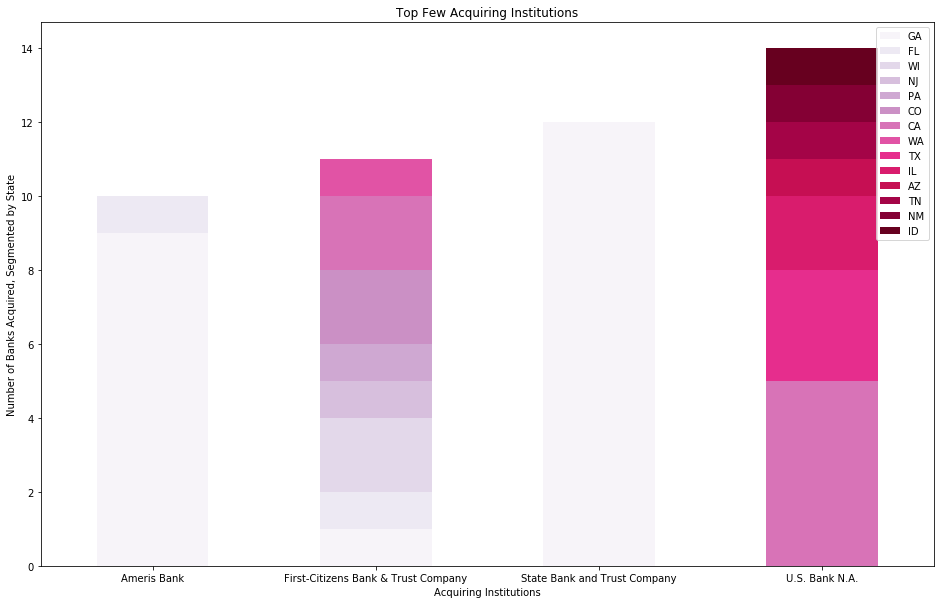

In [8]:
import numpy as np
bars1 = np.array([9, 1, 12, 0])
bars2 = np.array([1, 1, 0, 0])
bars3 = np.array([0, 2, 0, 0])
bars4 = np.array([0, 1, 0, 0])
bars5 = np.array([0, 1, 0, 0])
bars6 = np.array([0, 2, 0, 0])
bars7 = np.array([0, 2, 0, 5])
bars8 = np.array([0, 1, 0, 0])
bars9 = np.array([0, 0, 0, 3])
bars10 = np.array([0, 0, 0, 2])
bars11 = np.array([0, 0, 0, 1])
bars12 = np.array([0, 0, 0, 1])
bars13 = np.array([0, 0, 0, 1])
bars14 = np.array([0, 0, 0, 1]) 

#position of the bars on the x-axis:
N = np.arange(4)

#names of group and bar width
names = ['Ameris Bank', 'First-Citizens Bank & Trust Company', 'State Bank and Trust Company', 'U.S. Bank N.A.']
barWidth = 0.5
ind = [x for x, _ in enumerate(names)]

df=pd.DataFrame({'GA':bars1, 'FL':bars2, 'WI':bars3, 'NJ':bars4, 'PA':bars5, 'CO':bars6, 'CA':bars7, 'WA':bars8, 'TX':bars9, 'IL':bars10, 'AZ':bars11, 'TN':bars12, 'NM':bars13, 'ID':bars14})
df.plot(kind='bar', stacked=True, colormap='PuRd')

plt.xticks(ind, names, rotation=0)
plt.ylabel("Number of Banks Acquired, Segmented by State")
plt.xlabel("Acquiring Institutions")
plt.legend(loc="upper right")
plt.title("Top Few Acquiring Institutions")

plt.rcParams['figure.figsize'] = (16,10)

plt.show()

Ameris Bank, First-Citizens Bank & Trust Company, State Bank and Trust Company, and U.S. Bank N.A. are the top few institutions that acquired the most failed banks.  Ameris Bank acquired a total of 10 failed banks; First-Citizens acquired a total of 11 failed banks; State Bank acquired a total of 12 failed banks; and U.S. Bank acquired a total of 14 failed banks.  Among the banks that were acquired by these institutions, Georgia had the most acquisitions.  Most of Georgia's failed banks were acquired by State Bank and Ameris Bank.

# Circular plot of bank failures occurring each month since 2000

In [14]:
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20
from bokeh.plotting import figure, show
import math

output_notebook()

months = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]
failures = [51, 44, 40, 59, 43, 36, 74, 41, 38, 59, 35, 35]
x_pos = [2] * 12
y_pos = [2] * 12
starts = [math.radians(i * 30) for i in range(12)]
ends = [x + math.radians(30) for x in starts]
max_fails = max(failures)
radii = [x / max_fails * 1.8 for x in failures]
colors = Category20[12]

TOOLTIPS = [
    ("Month", "@months"),
    ("Failures", "@failures")
]

failure_source = ColumnDataSource(data=dict(months=months, failures=failures,
                                            x=x_pos, y=y_pos, radius=radii,
                                            start_angle=starts, end_angle=ends,
                                            color=colors))


p = figure(plot_width=400, plot_height=400, x_range=(0, 4), y_range=(0, 4), title="Failures", tooltips=TOOLTIPS)
           #toolbar_location=None, tools="")

p.wedge(x='x', y='y', radius='radius', start_angle='start_angle', end_angle='end_angle',
        color='color', source=failure_source)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False
p.yaxis.visible = False


show(p)

Loading BokehJS ...

Judging by the plot, the month of July seems to be a popular time of year when banks tend to fail; the total number of bank failures in July was 74.  On the other hand, November and December had the least number of bank failures at 35.

# Choropleth map representing the number of bank failures in each state since 2000

In [17]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

df = pd.read_csv('/Users/sandymartinez/Documents/python/failures_in_each_state.csv')
trc = dict(
    type = 'choropleth',
    locations = df['state'],
    locationmode = 'USA-states',
    z = df['failures'])
lyt =  dict(geo = dict(scope = 'usa'), title = 'Number of Bank Failures in Each State Since 2000')
map = go.Figure(data = [trc],
               layout = lyt)
py.iplot(map)

Based on the choropleth map, it seems that the top 3 most troubled states in terms of bank failures are Illinois, Florida, and Georgia.  Illinois has a total of 69 bank failures since 2000, with Florida having a total of 75 and Georgia having a total of 93 failures.  Alternatively, Maine, Vermont, Montana, North Dakota, Rhode Island and Alaska have had no bank failures since 2000.

There seems to be an observable pattern to the banks that failed to be acquired.  According to the data, Georgia seems to have the most number of banks that failed to be acquired.  This makes sense due to the fact that Georgia had the most bank failures at 93.  On the other hand, Georgia also had the most acquisitions among the top acquiring institutions.  Looking at the dates of the failed banks that were not acquired, the majority comes from the time period between 2009 and 2010. This is around the time of the aftermath of the Great Recession.

In [18]:
no_acquirer = pd.read_csv('banks_not_acquired.csv')
no_acquirer

,state,no_of_fails
0,CA,1
1,CT,1
2,MN,1
3,NJ,1
4,NV,1
5,PA,1
6,TN,1
7,AZ,2
8,CO,2
9,IL,3


The states that seemed to be the most troubled in terms of bank failures from 2000 were Illinois, Florida, and Georgia.  Illinois, Florida, and Georgia experienced 69, 75, and 93 bank failures during this time period, respectively.

Georgia, in particular, has a sizeable number of banks, especially small state banks.  Given the sharp increase in population that Georgia experienced, its banks responded by investing in more housing and development.  When problems arose in the housing market, however, these smaller banks found that they had less capital to cushion the blow.  Moreover, smaller local banks tend to make loans to people who otherwise would not be qualified to get a loan at larger banks, considerably increasing the risk that these banks take on. 

Illinois suffers from a high number of bank failures for reasons similar to Georgia's.  Most importantly, Illinois has a considerable number of banks.  This is an issue due to the possibility of systemic failure.  When one bank fails, panic might ensue, which can lead to occurrences such as bank runs, which in turn can cause other banks to fail as a sort of domino effect.  Systemic failure is more likely to occur due to some type of financial or market collapse.  Similar to Georgia, Illinois suffered from large housing markets being hit by foreclosures and falling home prices.

Like Georgia and Illinois, Florida's real estate market unfortunately contributed to its high number of bank failures.  When the real estate bubble burst, the banks' remaining amount of capital was not enough to help many of them recover from the blow.